In [1]:
%run 'init.ipynb'

['/home/rocchetti/MonteCarlo-studies-', '', '/project/lgrandi/anaconda3/envs/pax_v6.10.1/lib', '/project/lgrandi/anaconda3/envs/pax_v6.10.1/lib/python34.zip', '/project/lgrandi/anaconda3/envs/pax_v6.10.1/lib/python3.4', '/project/lgrandi/anaconda3/envs/pax_v6.10.1/lib/python3.4/plat-linux', '/project/lgrandi/anaconda3/envs/pax_v6.10.1/lib/python3.4/lib-dynload', '/project/lgrandi/anaconda3/envs/pax_v6.10.1/lib/python3.4/site-packages', '/project/lgrandi/anaconda3/envs/pax_v6.10.1/lib/python3.4/site-packages/msgpack_python-0.5.6-py3.4-linux-x86_64.egg', '/project/lgrandi/anaconda3/envs/pax_v6.10.1/lib/python3.4/site-packages/multihist-0.5.4-py3.4.egg', '/project/lgrandi/anaconda3/envs/pax_v6.10.1/lib/python3.4/site-packages/flake8-3.5.0-py3.4.egg', '/project/lgrandi/anaconda3/envs/pax_v6.10.1/lib/python3.4/site-packages/pbr-4.0.2-py3.4.egg', '/project/lgrandi/anaconda3/envs/pax_v6.10.1/lib/python3.4/site-packages/setuptools-39.0.1-py3.4.egg', '/project/lgrandi/anaconda3/envs/pax_v6.10.1

In [10]:
from pandas import HDFStore
from pandas import read_hdf
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [18]:
rootfile = '/home/rocchetti/MonteCarlo-studies-/output/Xenon1T_Cryostat_K40_00001_g4mc_G4.root'

df = read_root(rootfile, 'events/events')
name2 = '/home/rocchetti/MonteCarlo-studies-/output/test_'
columns = ['xp_pri', 'yp_pri','zp_pri',
     
          ]

data = pd.DataFrame()
data = df[columns]
type(data)

data.to_hdf(name2, key='data', mode='a')
data.head(3)

,xp_pri,yp_pri,zp_pri
0,238.227127,776.640076,-1521.197510
1,468.521362,-647.140381,-1729.909058
2,842.813110,126.698013,390.532349


In [197]:
data['rp_pri'] = np.sqrt(data.xp_pri*data.xp_pri + data.yp_pri*data.yp_pri)
data['rp_pri2'] = data.rp_pri*data.rp_pri 
offset = 1488/2
data['z'] = data.zp_pri + offset 
m1 = -0.40431
m2 = 0.38274
data['q1'] = data.z - m1* data.rp_pri 
data['q2'] = data.z - m2* data.rp_pri

/project/lgrandi/anaconda3/envs/pax_v6.10.1/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/project/lgrandi/anaconda3/envs/pax_v6.10.1/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/project/lgrandi/anaconda3/envs/pax_v6.10.1/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

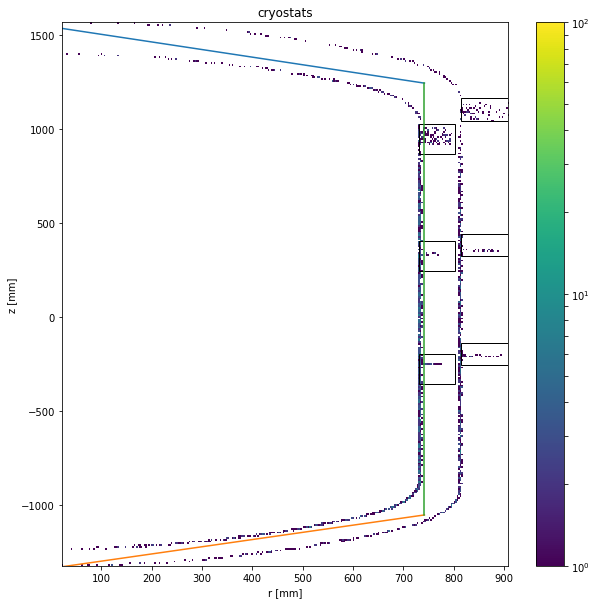

In [175]:
from matplotlib import colors
from matplotlib.colors import LogNorm
plt.figure(figsize=(10,10))
import matplotlib.patches as patches

plt.hist2d(data.rp_pri, data.z, bins = (300,300), #range = ((0, 100000), (0, 4000000)), 
           norm = LogNorm()
          )

plt.ylabel('z [mm]')
plt.xlabel('r [mm]')
plt.title("cryostats")
plt.clim(1,100)
plt.colorbar()

#rect = patches.Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none')
currentAxis = plt.gca()
#STIFFENING RINGS INNERCRYO
currentAxis.add_patch(Rectangle((732, 125+offset), 70, 160,alpha=1, fill=None ))
currentAxis.add_patch(Rectangle((732, -500+offset), 70, 160,alpha=1, fill=None ))
currentAxis.add_patch(Rectangle((732, -1100+offset), 70, 160,alpha=1, fill=None ))
#STIFFENING RINGS OUTCYRO
currentAxis.add_patch(Rectangle((815, 300+offset), 100, 120,alpha=1, fill=None ))
currentAxis.add_patch(Rectangle((815, -420+offset), 100, 120,alpha=1, fill=None ))
currentAxis.add_patch(Rectangle((815, -1000+offset), 100, 120,alpha=1, fill=None ))



# points = ((1,1), (2,1), (2,2), (1,2), (0.5,1.5))
points = ((0,732), (800,500), (-2080,-1796), (0,732))
#draw.polygon((points), fill=200)

#:wqfv2= (pow(TMath::Abs((z_fv)/634.),3.0)+pow(TMath::Abs((r2)/401956.),3.0));

plt.plot([0,742],[800+offset,500+offset])
plt.plot([0,742],[-2080+offset,-1796+offset])
plt.plot([742,742],[500+offset,-1796+offset])


plt.show()

1544.0


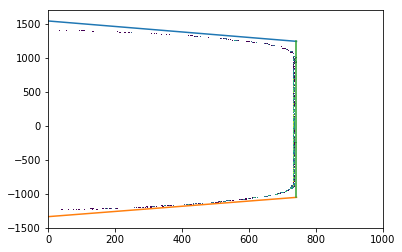

In [220]:
print(800+offset)
df_in = pd.DataFrame()
#df_in = data[data['rp_pri'] < 730 ] 
df_in = data[data['q1'] <= 800+offset] 
df_in = df_in[df_in['q2'] > -2080+offset] 
df_in = df_in[df_in.rp_pri < 742]
#df_in = df_in[df_in['zp_pri'] < 700 ] 
#data['rp_incryo'] = data['rp_incryo'].dropna()
df_in.head(10)
plt.plot([0,742],[800+offset,500+offset])
plt.plot([0,742],[-2080+offset,-1796+offset])
plt.plot([742,742],[500+offset,-1796+offset])

plt.hist2d(df_in.rp_pri, df_in.z, bins = (300,300), range = ((0, 1000), (-1500, +1700)), 
           norm = LogNorm()
          )
plt.show()


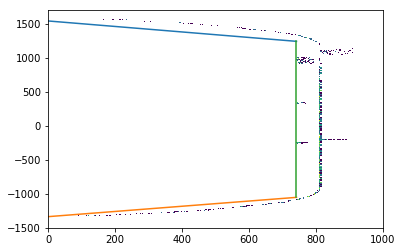

In [232]:
df_out = pd.DataFrame()
df_out2 = pd.DataFrame()
df_out1 = pd.DataFrame()
df_out1 = data[data['q1'] > 800+offset] 
df_out2 = data[data['q2'] < -2080+offset] 
df_out = pd.concat([df_out1, df_out2])
                    
df_out3 = data[data.rp_pri > 742] 
df_out4 = df_out3[df_out3.rp_pri < 750] 

df_out = pd.concat([df_out, df_out3, df_out4])

df_out.head(10)
plt.plot([0,742],[800+offset,500+offset])
plt.plot([0,742],[-2080+offset,-1796+offset])
plt.plot([742,742],[500+offset,-1796+offset])

plt.hist2d(df_out.rp_pri, df_out.z, bins = (300,300), range = ((0, 1000), (-1500, +1700)), 
           norm = LogNorm()
          )
plt.show()


In [237]:
#fv2 = ((abs(data.z/634.))**3+abs(data.rp_pri/401956.)**3)
data['fv'] = ((abs(data.z/634.))**3+abs(data.rp_pri/401956.)**3) 

/project/lgrandi/anaconda3/envs/pax_v6.10.1/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [238]:
def fiducialize(df):
    if df['fv']<1:
        df_fid = 
    

0    1.842156
1    3.760476
2    5.730372
3    5.094369
4    3.544450
5    0.008519
6    6.982110
7    0.485914
8    6.104985
Name: fv, dtype: float32